In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [3]:
np.random.seed(16082011)

 - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor
 - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor

In [4]:
def f(x):
    return x/(x+2)**5

In [5]:
x = np.linspace(0, 10, 501)
x = np.logspace(-1, 1, base=10, num=501)
y = f(x)
e1 = np.random.randn(x.size)
e2 = np.random.randn(x.size)
yxp = y + np.abs(y)*e1/5 + e2/1e5

In [6]:
df = pd.DataFrame({'x': x, 'yth': y, 'yexp': yxp})
df.head()

,x,yth,yexp
0,0.100000,0.002449,0.002611
1,0.100925,0.002466,0.002501
2,0.101859,0.002483,0.002349
3,0.102802,0.002500,0.002921
4,0.103753,0.002518,0.002423


In [7]:
params = {
    #'n_neighbors': np.arange(1, 21),
    #'alpha': np.logspace(-3, -1, 5)
    #'n_estimators': [100, 400, 500, 1000, 2000, 4000]
    
}
params

{}

In [8]:
model = TransformedTargetRegressor(
    regressor=Pipeline([
        ('Scaler', StandardScaler()),
        #('Model', GridSearchCV(RandomForestRegressor(n_estimators=50), params))
        #('Model', GridSearchCV(RandomForestRegressor(), params))
        #('Model', GridSearchCV(DecisionTreeRegressor(min_samples_split=20), params))
        #('Model', GridSearchCV(KNeighborsRegressor(), params))
        ('Model', GridSearchCV(MLPRegressor(
            hidden_layer_sizes=(100, 100, 100), solver='lbfgs', max_iter=1e4), params))
    ]),
    transformer=StandardScaler()
)

In [9]:
model.fit(df[['x']], df['yexp'])

TransformedTargetRegressor(regressor=Pipeline(steps=[('Scaler',
                                                      StandardScaler()),
                                                     ('Model',
                                                      GridSearchCV(estimator=MLPRegressor(hidden_layer_sizes=(100,
                                                                                                              100,
                                                                                                              100),
                                                                                          max_iter=10000.0,
                                                                                          solver='lbfgs'),
                                                                   param_grid={}))]),
                           transformer=StandardScaler())

In [10]:
model.regressor_[-1].cv_results_

{'mean_fit_time': array([10.03071256]),
 'std_fit_time': array([5.5651921]),
 'mean_score_time': array([0.00194216]),
 'std_score_time': array([0.00022921]),
 'params': [{}],
 'split0_test_score': array([-0.62235093]),
 'split1_test_score': array([-0.09711738]),
 'split2_test_score': array([0.0493578]),
 'split3_test_score': array([0.03526253]),
 'split4_test_score': array([-922.90711764]),
 'mean_test_score': array([-184.70839312]),
 'std_test_score': array([369.09944345]),
 'rank_test_score': array([1], dtype=int32)}

In [11]:
model.regressor_[-1].get_params()

{'cv': None,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100, 100, 100),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 10000.0,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=10000.0,
              solver='lbfgs'),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {},
 'pre_dispatch': '2*n_j

In [12]:
model.regressor_[-1].best_params_

{}

In [13]:
model.regressor_[-1].best_estimator_

MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=10000.0,
             solver='lbfgs')

In [14]:
model.regressor_[-1].best_estimator_.score(df[['x']], df['yexp'])

-330852.1351614489

In [15]:
df['yhat'] = model.predict(df[['x']])

In [16]:
metrics.r2_score(df['yexp'], df['yhat'])

0.897868052187292

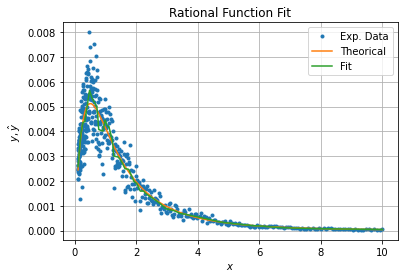

In [19]:
fig, axe = plt.subplots()
axe.plot(df['x'], df['yexp'], '.', label='Exp. Data')
axe.plot(df['x'], df['yth'], label="Theorical")
axe.plot(df['x'], df['yhat'], label="Fit")
axe.set_title("Rational Function Fit")
axe.set_ylabel("$y, \hat{y}$")
axe.set_xlabel("$x$")
axe.legend()
axe.grid()